In [3]:
pip install wordcloud matplotlib pandas textblob

Note: you may need to restart the kernel to use updated packages.


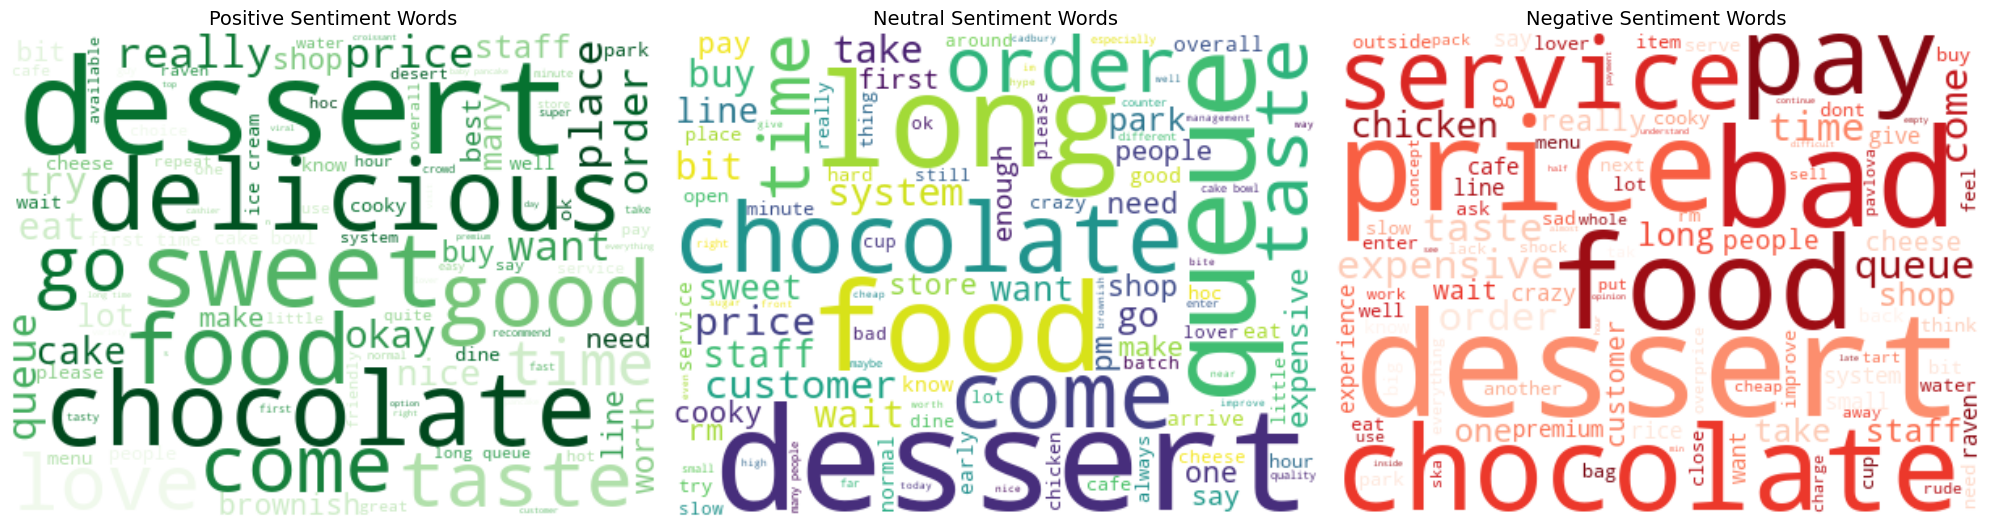

In [4]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob
import ast
import numpy as np

# Load data and preprocess
df = pd.read_csv('processed-reviewsv2.csv')
df['processed_review'] = df['processed_review'].apply(ast.literal_eval)
df['clean_text'] = df['processed_review'].apply(lambda x: ' '.join(x))
df['sentiment'] = df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment_category'] = df['sentiment'].apply(lambda x: 'Positive' if x > 0.1 else 'Negative' if x < -0.1 else 'Neutral')

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Generate word clouds for each sentiment
for i, sentiment in enumerate(['Positive', 'Neutral', 'Negative']):
    # Filter reviews by sentiment
    text = ' '.join(df[df['sentiment_category'] == sentiment]['clean_text'])
    
    # Create WordCloud
    wordcloud = WordCloud(
        background_color='white',
        max_words=100,
        width=400,
        height=300,
        colormap='viridis' if sentiment == 'Neutral' else 'Greens' if sentiment == 'Positive' else 'Reds'
    ).generate(text)
    
    # Plot
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(f'{sentiment} Sentiment Words', fontsize=14)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

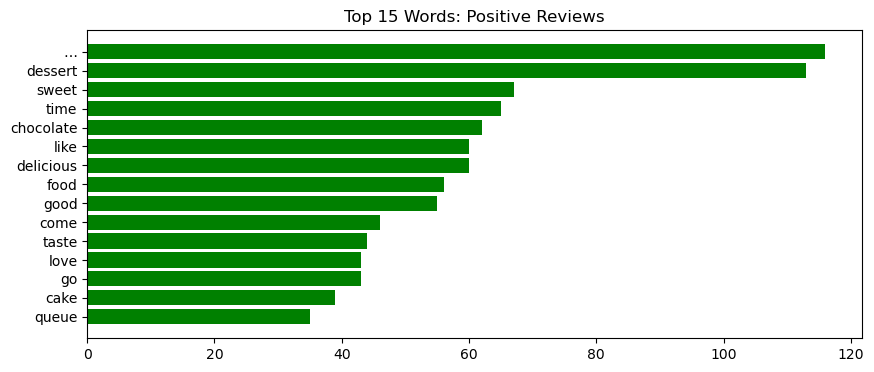

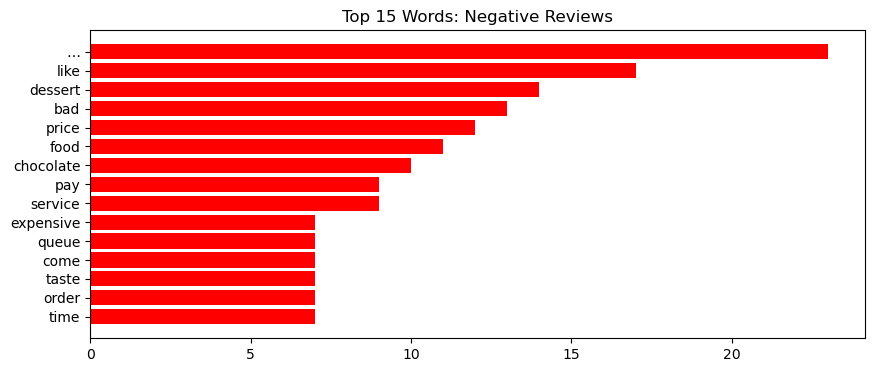

In [5]:
from collections import Counter

def plot_top_words(sentiment, color):
    words = ' '.join(df[df['sentiment_category'] == sentiment]['clean_text']).split()
    word_counts = Counter(words).most_common(15)
    
    plt.figure(figsize=(10, 4))
    plt.barh([w[0] for w in word_counts], [w[1] for w in word_counts], color=color)
    plt.title(f'Top 15 Words: {sentiment} Reviews')
    plt.gca().invert_yaxis()

plot_top_words('Positive', 'green')
plot_top_words('Negative', 'red')

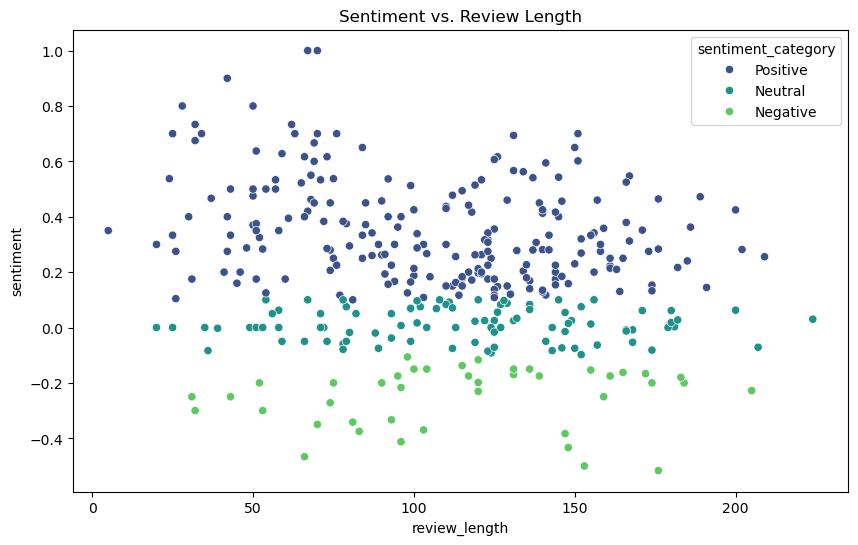

In [8]:
df['review_length'] = df['clean_text'].apply(len)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_length', y='sentiment', hue='sentiment_category', data=df, palette='viridis')
plt.title('Sentiment vs. Review Length')
plt.show()

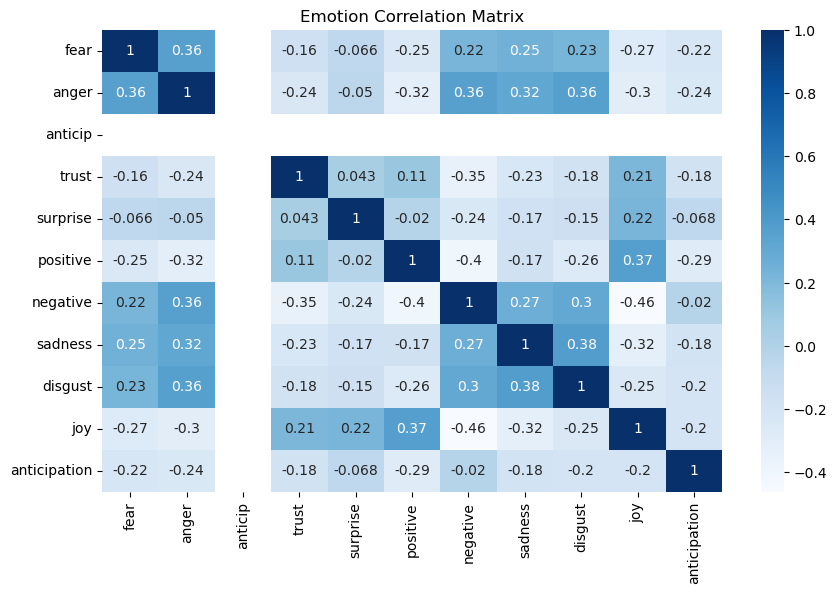

In [10]:
!pip install nrclex
from nrclex import NRCLex

def get_emotion(text):
    return NRCLex(text).affect_frequencies

df['emotions'] = df['clean_text'].apply(lambda x: get_emotion(x))
emotion_df = pd.DataFrame(df['emotions'].tolist()).fillna(0)

plt.figure(figsize=(10, 6))
sns.heatmap(emotion_df.corr(), annot=True, cmap='Blues')
plt.title('Emotion Correlation Matrix')
plt.show()